# PRCP-1002-Handwritten Digits Recognition

# Problem Statement

* Task 1:-Prepare a complete data analysis report on the given data.
* Task 2:- Classify a given image of a handwritten digit into one of the 10 classes
  representing integer values from 0 to 9.
* Task3:- Compare between various models and find the classifier that works
  better.

## Important library

In [90]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

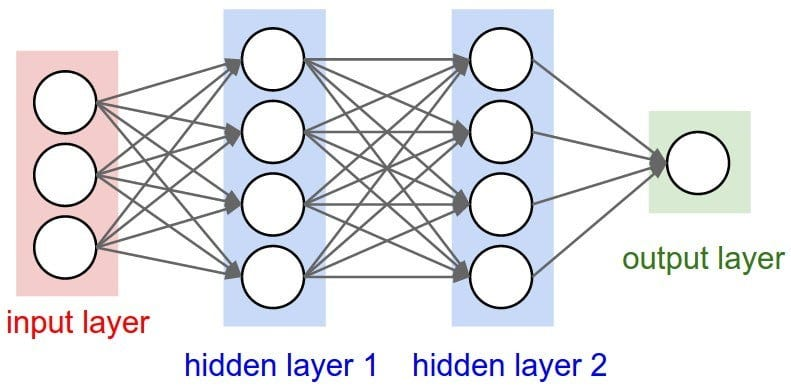

## Data Collection

In this notebook, we train a Convolutional Neural Network to classify images from the MNIST database.

### 1. Load MNIST Database

MNIST is one of the most famous datasets in the field of machine learning.
 - It has 60,000 images of hand-written digits
 - Very straight forward to download
 - Images dimensions are 28x28
 - Grayscale images

In [91]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## SVM

In [92]:
# Reshape the data and normalize
x_train_reshaped = x_train.reshape((60000, 784)).astype('float32') / 255 #(60000, 784)
x_test_reshaped = x_test.reshape((10000, 784)).astype('float32') / 255 #(10000, 784)

x_train_sub, x_test_sub, y_train_sub, y_test_sub =train_test_split(x_train_reshaped, y_train, train_size=0.1, random_state=42, stratify=y_train)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the SVM classifier
svm_classifier.fit(x_train_sub, y_train_sub)

# Predict the labels for the test set
y_pred_svm = svm_classifier.predict(x_test_reshaped)

# Calculate the accuracy for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy of SVM",accuracy_svm)

Accuracy of SVM 0.9113


## KNN

In [93]:
# Normalize the data
scaler = StandardScaler()
x_train_flat = scaler.fit_transform(x_train_reshaped)
x_test_flat = scaler.transform(x_test_reshaped)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(x_train_reshaped, y_train)

# Predict on a subset of test data for quicker results
y_pred = knn.predict(x_test_flat)

# Calculate accuracy on the subset
accuracy = accuracy_score(y_test, y_pred)
print('KNN accuracy on subset:', accuracy)

KNN accuracy on subset: 0.9427


## Basic Check

In [94]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [95]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [96]:
x_train[0].shape

(28, 28)

In [97]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

The image number is :-  5


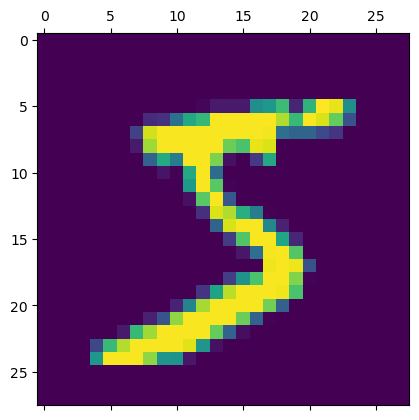

In [98]:
plt.matshow(x_train[0])
print("The image number is :- ",y_train[0])

The image number is :-  0


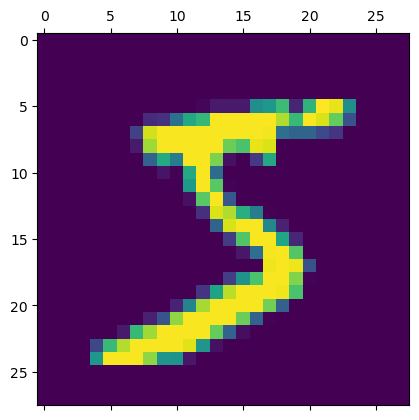

In [99]:
plt.matshow(x_train[0])
print("The image number is :- ",y_train[1])

The image number is :-  4


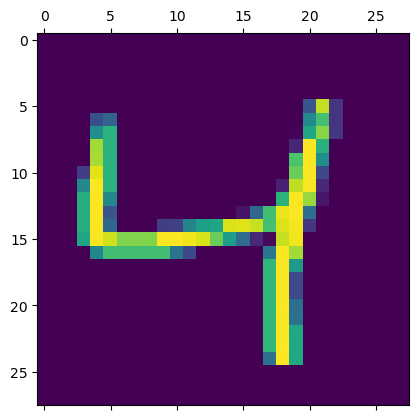

In [100]:
plt.matshow(x_train[2])
print("The image number is :- ",y_train[2])

The image number is :-  1


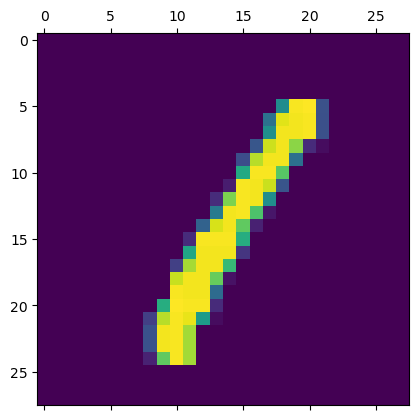

In [101]:
plt.matshow(x_train[3])
print("The image number is :- ",y_train[3])

## Data Preprocessing

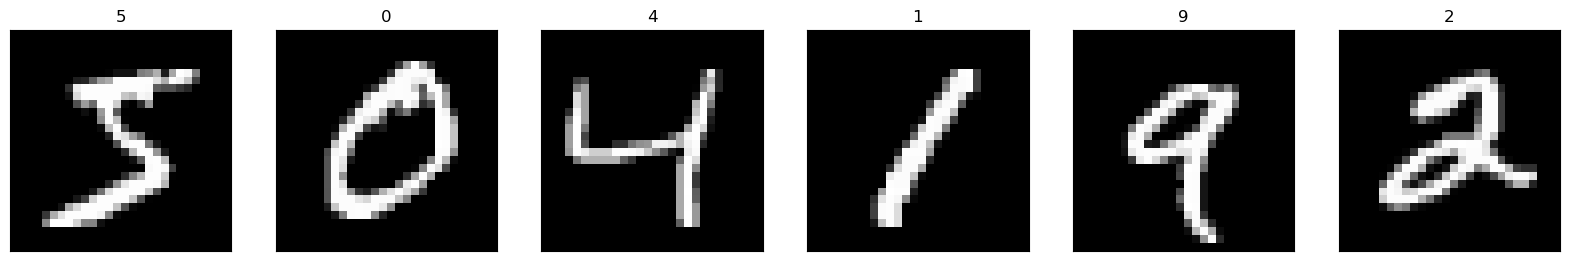

In [102]:
#Visualize the First Six Training Images
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

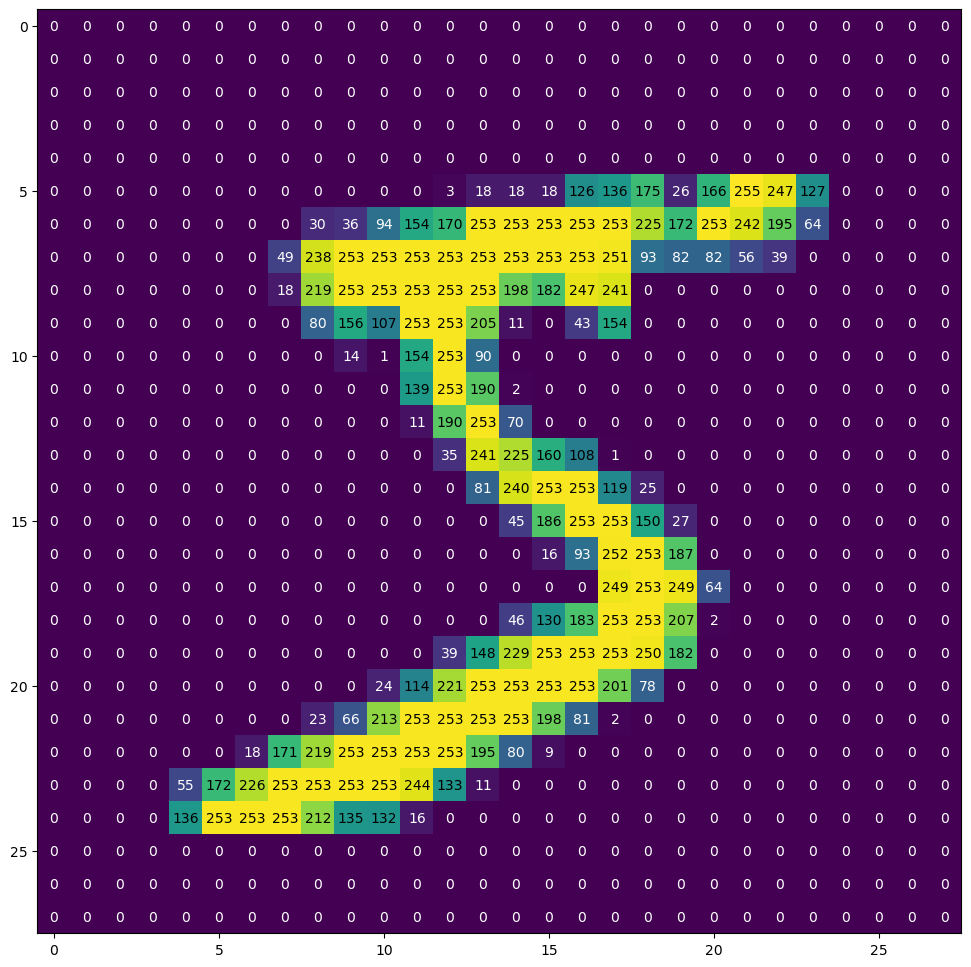

In [103]:
#View an Image in More Detail
def visualize_input(img, ax):
    ax.imshow(img)
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
visualize_input(x_train[0], ax)

<Axes: >

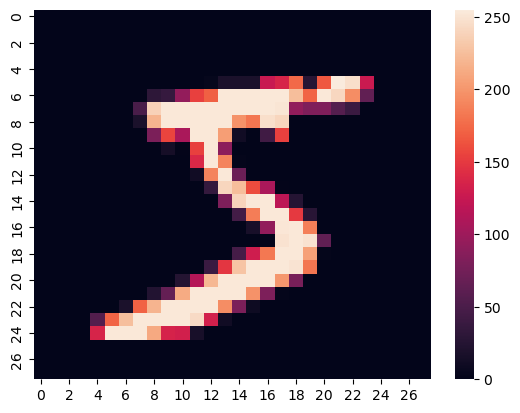

In [104]:
import seaborn as sns
sns.heatmap(x_train[0])

In [105]:
x_train[0].dtype

dtype('uint8')

## CNN Architecture

You must pass the following arguments:

1) filters - The number of filters.
2) kernel_size - Number specifying both the height and width of the (square) convolution window.
3) There are some additional, optional arguments that you might like to tune:
4) strides - The stride of the convolution. If you don't specify anything, strides is set to 1.
5) padding - One of 'valid' or 'same'. If you don't specify anything, padding is set to 'valid'.
6) activation - Typically 'relu'. If you don't specify anything, no activation is applied. You are strongly encouraged to add a 7) ReLU activation function to every convolutional layer in your networks.

** Things to remember **
1) Always add a ReLU activation function to the Conv2D layers in your CNN. With the exception of the final layer in the network, Dense layers should also have a ReLU activation function.
2) When constructing a network for classification, the final layer in the network should be a Dense layer with a softmax activation function. The number of nodes in the final layer should equal the total number of classes in the dataset.

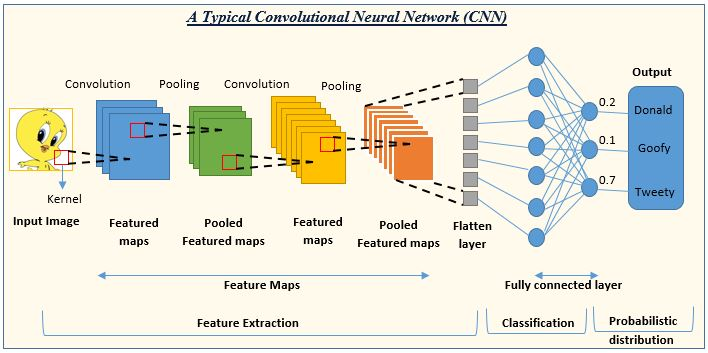

## Change datatype and convert image into 0 to 1 format

In [106]:
X_train = x_train.astype('float32')/255
X_test = x_test.astype('float32')/255

print('X_train shape:', X_train.shape)
print('X_test shape:',X_test.shape)

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)


## Preprocess the labels: Encode Categorical Integer Labels Using a One-Hot Scheme

In [107]:
# from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
num_classes = 10

# one-hot encode the labels
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print(y_train[0])
print(y_test[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


## Convolutional Neural Network

In [108]:
X_train = tf.reshape(X_train, (-1, 28, 28, 1))
X_test = tf.reshape(X_test, (-1, 28, 28, 1))

# build the model object
model = Sequential()

# CONV_1: add CONV layer with RELU activation and depth = 32 kernels
model.add(Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu',input_shape=(28,28,1)))

# POOL_1: downsample the image to choose the best features
model.add(MaxPooling2D(pool_size=(2, 2)))

# CONV_2: here we increase the depth to 64
model.add(Conv2D(64,(3, 3),padding='same', activation='relu'))

# POOL_2: more downsampling
model.add(MaxPooling2D(pool_size=(2, 2)))

# flatten since too many dimensions, we only want a classification output
model.add(Flatten())

# FC_1: fully connected to get all relevant data #input layer
model.add(Dense(64, activation='relu'))

# FC_2: output a softmax to squash the matrix into output probabilities for the 10 classes
model.add(Dense(10, activation='softmax'))#output layer

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 3136)              0         
                                                                 
 dense_28 (Dense)            (None, 64)              

In [109]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [110]:
hist = model.fit(X_train, y_train, batch_size=64, epochs=10,
          validation_data=(X_test, y_test),
          verbose=2, shuffle=True)

Epoch 1/10
938/938 - 49s - loss: 0.1535 - accuracy: 0.9537 - val_loss: 0.0451 - val_accuracy: 0.9846 - 49s/epoch - 52ms/step
Epoch 2/10
938/938 - 48s - loss: 0.0471 - accuracy: 0.9856 - val_loss: 0.0371 - val_accuracy: 0.9874 - 48s/epoch - 51ms/step
Epoch 3/10
938/938 - 43s - loss: 0.0326 - accuracy: 0.9896 - val_loss: 0.0320 - val_accuracy: 0.9894 - 43s/epoch - 46ms/step
Epoch 4/10
938/938 - 43s - loss: 0.0251 - accuracy: 0.9916 - val_loss: 0.0332 - val_accuracy: 0.9880 - 43s/epoch - 46ms/step
Epoch 5/10
938/938 - 43s - loss: 0.0198 - accuracy: 0.9937 - val_loss: 0.0420 - val_accuracy: 0.9874 - 43s/epoch - 46ms/step
Epoch 6/10
938/938 - 43s - loss: 0.0156 - accuracy: 0.9949 - val_loss: 0.0318 - val_accuracy: 0.9893 - 43s/epoch - 46ms/step
Epoch 7/10
938/938 - 45s - loss: 0.0117 - accuracy: 0.9961 - val_loss: 0.0307 - val_accuracy: 0.9911 - 45s/epoch - 48ms/step
Epoch 8/10
938/938 - 43s - loss: 0.0109 - accuracy: 0.9964 - val_loss: 0.0387 - val_accuracy: 0.9887 - 43s/epoch - 46ms/step


In [112]:
score = model.evaluate(X_test, y_test, verbose=0)
score

[0.02920795977115631, 0.9911999702453613]

* We are used CNN Architecture for our models
  1) Convlution2D
  2) kernal size
  3) padding size
  4) input activation= relu
  5) pool_size
  6) MaxPooling2D
  7) output activation= softmax
  8) Accuracy = 99%

## Artificial Neural Network

In [113]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [114]:
# normalize the pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [115]:
# convert the labels to one-hot vectors
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [116]:
classifier1 = Sequential()

# flatten the input image into a one-dimensional vector of 784 features
classifier1.add(Flatten(input_shape=(28, 28)))

# add a dense layer with 64 neurons and relu activation
classifier1.add(Dense(units=64,activation="relu")) #input layer

# add a dense layer with 10 neurons and softmax activation for the output probabilities
classifier1.add(Dense(units=10,activation="softmax"))#output layer

# compile the model by specifying the loss function, the optimizer, and the metrics
classifier1.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

# print the summary of the model
classifier1.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 64)                50240     
                                                                 
 dense_31 (Dense)            (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [117]:
History1 = classifier1.fit(x_train, y_train, batch_size=64, epochs=10,
          validation_data=(x_test, y_test),
          verbose=2, shuffle=True)

Epoch 1/10
938/938 - 4s - loss: 0.3483 - accuracy: 0.9043 - val_loss: 0.2037 - val_accuracy: 0.9409 - 4s/epoch - 4ms/step
Epoch 2/10
938/938 - 3s - loss: 0.1649 - accuracy: 0.9535 - val_loss: 0.1377 - val_accuracy: 0.9580 - 3s/epoch - 3ms/step
Epoch 3/10
938/938 - 3s - loss: 0.1224 - accuracy: 0.9647 - val_loss: 0.1215 - val_accuracy: 0.9643 - 3s/epoch - 3ms/step
Epoch 4/10
938/938 - 3s - loss: 0.0970 - accuracy: 0.9722 - val_loss: 0.1039 - val_accuracy: 0.9682 - 3s/epoch - 4ms/step
Epoch 5/10
938/938 - 3s - loss: 0.0798 - accuracy: 0.9767 - val_loss: 0.0946 - val_accuracy: 0.9695 - 3s/epoch - 3ms/step
Epoch 6/10
938/938 - 3s - loss: 0.0683 - accuracy: 0.9792 - val_loss: 0.0904 - val_accuracy: 0.9722 - 3s/epoch - 4ms/step
Epoch 7/10
938/938 - 3s - loss: 0.0587 - accuracy: 0.9824 - val_loss: 0.0900 - val_accuracy: 0.9709 - 3s/epoch - 3ms/step
Epoch 8/10
938/938 - 3s - loss: 0.0508 - accuracy: 0.9851 - val_loss: 0.0865 - val_accuracy: 0.9737 - 3s/epoch - 3ms/step
Epoch 9/10
938/938 - 3s 

In [118]:
score1 = classifier1.evaluate(x_test, y_test, verbose=0)
score1

[0.07831789553165436, 0.9754999876022339]

In [119]:
# predict the labels of the testing data using the model
y_pred = classifier1.predict(x_test)

313/313 [==============================] - 1s 2ms/step


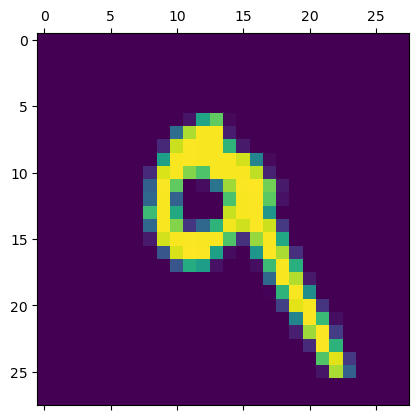

In [120]:
plt.matshow(x_test[7])

In [121]:
#np.argmax finds a maximum element from an array and returns the index of it
np.argmax(y_pred[7])

9

In [122]:
import tensorflow as tf
labels = tf.argmax(y_test, axis=1)
predictions = tf.argmax(y_pred, axis=1)
cm = tf.math.confusion_matrix(labels, predictions)
cm = tf.math.confusion_matrix(labels, predictions, num_classes=10)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    2,    1,    0,    2,    3,    2,    1,    1],
       [   0, 1122,    5,    0,    0,    1,    5,    1,    1,    0],
       [   6,    1, 1008,    1,    2,    0,    2,    4,    8,    0],
       [   1,    0,    5,  985,    0,    4,    0,    7,    4,    4],
       [   1,    1,    3,    1,  953,    0,    6,    2,    1,   14],
       [   2,    0,    0,    9,    0,  869,    6,    2,    1,    3],
       [   6,    3,    6,    1,    3,    1,  938,    0,    0,    0],
       [   1,    2,   10,    2,    1,    1,    0, 1001,    2,    8],
       [   4,    0,    3,    7,    5,    3,    5,    3,  939,    5],
       [   3,    4,    0,    9,    8,    3,    0,    6,    4,  972]])>

Text(95.72222222222221, 0.5, 'Truth')

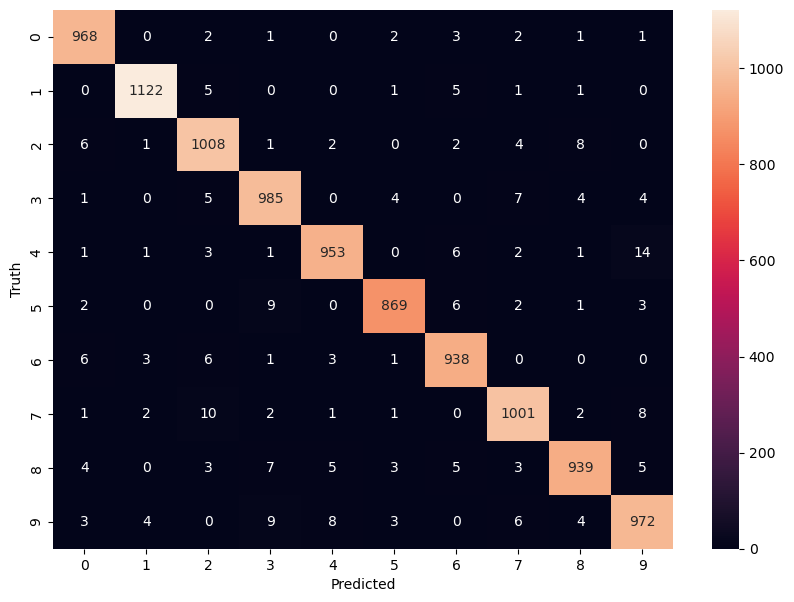

In [123]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

* We are used Simple neural network 
   1) Input layer = activation(relu)
   2) Output layer = activation(softmax)
   3) Otimizer = Adam
   4) Accuray = 97%

## Add Hidden Layer

In [124]:
classifier2 = Sequential()
classifier2.add(Flatten(input_shape=(28, 28)))
classifier2.add(Dense(units=64,activation="relu")) #input layer
classifier2.add(Dense(units=100,activation="relu"))#hidden layer
classifier2.add(Dense(units=155,activation="relu"))#hidden layer
classifier2.add(Dense(units=10,activation="softmax"))#output layer
classifier2.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
classifier2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 64)                50240     
                                                                 
 dense_33 (Dense)            (None, 100)               6500      
                                                                 
 dense_34 (Dense)            (None, 155)               15655     
                                                                 
 dense_35 (Dense)            (None, 10)                1560      
                                                                 
Total params: 73955 (288.89 KB)
Trainable params: 73955 (288.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [125]:
History2= classifier2.fit(x_train, y_train, batch_size=64, epochs=1,
          validation_data=(x_test, y_test),
          verbose=2, shuffle=True)

938/938 - 5s - loss: 0.2913 - accuracy: 0.9154 - val_loss: 0.1582 - val_accuracy: 0.9509 - 5s/epoch - 6ms/step


In [126]:
score2 = classifier2.evaluate(x_test, y_test, verbose=0)
score2

[0.15821751952171326, 0.9509000182151794]

* We are used Simple neural network 
   1) Input layer = activation(relu)
   2) Output layer = activation(softmax)
   3) Otimizer = Adam
   4) Hidden Layer = 2
   4) Accuray = 95%

## Add More Neuron 

In [127]:
classifier3 = Sequential()
classifier3.add(Flatten(input_shape=(28, 28)))
classifier3.add(Dense(units=1000,activation="relu")) 
classifier3.add(Dense(units=10,activation="softmax"))
classifier3.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
classifier3.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 1000)              785000    
                                                                 
 dense_37 (Dense)            (None, 10)                10010     
                                                                 
Total params: 795010 (3.03 MB)
Trainable params: 795010 (3.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [128]:
history3 = classifier3.fit(x_train, y_train, batch_size=64, epochs=1,
          validation_data=(x_test, y_test),
          verbose=2, shuffle=True)

938/938 - 13s - loss: 0.2044 - accuracy: 0.9397 - val_loss: 0.1111 - val_accuracy: 0.9664 - 13s/epoch - 14ms/step


In [129]:
score3 = classifier3.evaluate(x_test, y_test, verbose=0)
score3

[0.11106844246387482, 0.9664000272750854]

* We are used Simple neural network 
   1) Input layer = activation(relu)
   2) Output layer = activation(softmax)
   3) Otimizer = Adam
   4) 1000 Neuron in a input layer 
   5) Accuray = 96%

## Sigmoid Activation Function - input layer

In [130]:
classifier4 = Sequential()
classifier4.add(Flatten(input_shape=(28, 28)))
classifier4.add(Dense(units=64,activation="sigmoid")) #input layer
classifier4.add(Dense(units=10,activation="softmax"))#output layer
classifier4.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
classifier4.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 784)               0         
                                                                 
 dense_38 (Dense)            (None, 64)                50240     
                                                                 
 dense_39 (Dense)            (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [131]:
history4 = classifier4.fit(x_train, y_train, batch_size=64, epochs=1,
          validation_data=(x_test, y_test),
          verbose=2, shuffle=True)

938/938 - 4s - loss: 0.5746 - accuracy: 0.8674 - val_loss: 0.2914 - val_accuracy: 0.9212 - 4s/epoch - 4ms/step


In [132]:
score4 = classifier4.evaluate(x_test, y_test, verbose=0)
score4

[0.29139554500579834, 0.9211999773979187]

* We are used Simple neural network 
   1) Input layer = activation(sigmoid)
   2) Output layer = activation(softmax)
   3) Otimizer = Adam
   4) Accuray = 92%

## Softplus Activation Function - input layer

In [133]:
classifier5 = Sequential()
classifier5.add(Flatten(input_shape=(28, 28)))
classifier5.add(Dense(units=64,activation="softplus")) 
classifier5.add(Dense(units=10,activation="softmax"))
classifier5.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])
classifier5.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 784)               0         
                                                                 
 dense_40 (Dense)            (None, 64)                50240     
                                                                 
 dense_41 (Dense)            (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [134]:
history5 = classifier5.fit(x_train, y_train, batch_size=64, epochs=1,
          validation_data=(x_test, y_test),
          verbose=2, shuffle=True)

938/938 - 4s - loss: 0.4054 - accuracy: 0.8875 - val_loss: 0.2460 - val_accuracy: 0.9308 - 4s/epoch - 4ms/step


In [135]:
score5 = classifier5.evaluate(x_test, y_test, verbose=0)
score5

[0.24601343274116516, 0.9308000206947327]

* We are used Simple neural network 
   1) Input layer = activation(softplus)
   2) Output layer = activation(softmax)
   3) Otimizer = Adam
   4) Accuray = 92%

## Tanh Activation Function - Input Layer

In [136]:
classifier6 = Sequential()
classifier6.add(Flatten(input_shape=(28, 28)))
classifier6.add(Dense(units=64,activation="tanh")) 
classifier6.add(Dense(units=10,activation="softmax"))
classifier6.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
classifier6.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 784)               0         
                                                                 
 dense_42 (Dense)            (None, 64)                50240     
                                                                 
 dense_43 (Dense)            (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [137]:
history6 = classifier6.fit(x_train, y_train, batch_size=64, epochs=1,
          validation_data=(x_test, y_test),
          verbose=2, shuffle=True)

938/938 - 3s - loss: 0.3599 - accuracy: 0.9011 - val_loss: 0.2158 - val_accuracy: 0.9380 - 3s/epoch - 4ms/step


In [138]:
score6 = classifier6.evaluate(X_test, y_test, verbose=0)
score6

[0.21579231321811676, 0.9380000233650208]

## Leaky ReLU Activation Function

In [139]:
from keras.layers import LeakyReLU
classifier7 = Sequential()
classifier7.add(Flatten(input_shape=(28, 28)))
classifier7.add(Dense(units=64)) 
classifier7.add(LeakyReLU(alpha=0.1))
classifier7.add(Dense(units=10,activation="softmax"))
classifier7.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
classifier7.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_20 (Flatten)        (None, 784)               0         
                                                                 
 dense_44 (Dense)            (None, 64)                50240     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_45 (Dense)            (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [140]:
history7 = classifier7.fit(x_train, y_train, batch_size=64, epochs=1,
          validation_data=(x_test, y_test),
          verbose=2, shuffle=True)

938/938 - 3s - loss: 0.3576 - accuracy: 0.9005 - val_loss: 0.2156 - val_accuracy: 0.9371 - 3s/epoch - 4ms/step


In [141]:
score7 = classifier7.evaluate(X_test, y_test, verbose=0)
score7

[0.21557292342185974, 0.9370999932289124]

* We are used Simple neural network 
   1) Input layer = activation(LeakyReLU)
   2) Output layer = activation(softmax)
   3) Otimizer = Adam
   4) Accuray = 93%

## Use SGD Optimizer

In [142]:
classifier8 = Sequential()
classifier8.add(Flatten(input_shape=(28, 28)))
classifier8.add(Dense(units=64,activation="relu")) 
classifier8.add(Dense(units=10,activation="softmax"))
classifier8.compile(optimizer="sgd",loss="categorical_crossentropy",metrics=["accuracy"])
classifier8.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_21 (Flatten)        (None, 784)               0         
                                                                 
 dense_46 (Dense)            (None, 64)                50240     
                                                                 
 dense_47 (Dense)            (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [143]:
history8 = classifier8.fit(x_train, y_train, batch_size=64, epochs=1,
          validation_data=(x_test, y_test),
          verbose=2, shuffle=True)

938/938 - 3s - loss: 0.9265 - accuracy: 0.7705 - val_loss: 0.4802 - val_accuracy: 0.8759 - 3s/epoch - 3ms/step


In [144]:
score8 = classifier8.evaluate(x_test, y_test, verbose=0)
score8

[0.480209082365036, 0.8758999705314636]

* We are used Simple neural network 
   1) Input layer = activation(relu)
   2) Output layer = activation(softmax)
   3) Otimizer = SGD
   4) Accuray = 87%

## Use Adagrad Optimizer

In [145]:
from keras.optimizers import Adagrad
adagrad = Adagrad(learning_rate=0.01, initial_accumulator_value=0.1, epsilon=1e-07, weight_decay=0.001)
classifier11 = Sequential()
classifier11.add(Flatten(input_shape=(28, 28)))
classifier11.add(Dense(units=64,activation="relu")) 
classifier11.add(Dense(units=10,activation="softmax"))
classifier11.compile(optimizer="Adagrad",loss="categorical_crossentropy",metrics=["accuracy"])
classifier11.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_22 (Flatten)        (None, 784)               0         
                                                                 
 dense_48 (Dense)            (None, 64)                50240     
                                                                 
 dense_49 (Dense)            (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [146]:
hist11 = classifier11.fit(x_train, y_train, batch_size=64, epochs=1,
          validation_data=(x_test, y_test),
          verbose=2, shuffle=True)

938/938 - 4s - loss: 1.7335 - accuracy: 0.5363 - val_loss: 1.1863 - val_accuracy: 0.7734 - 4s/epoch - 4ms/step


In [147]:
score11 = classifier11.evaluate(x_test, y_test, verbose=0)
score11

[1.186320185661316, 0.7734000086784363]

* We are used Simple neural network 
   1) Input layer = activation(ReLU)
   2) Output layer = activation(softmax)
   3) Otimizer = Adagrad
   4) Accuray = 77%

## Use RMSprop Optimizer

In [148]:
classifier12 = Sequential()
classifier12.add(Flatten(input_shape=(28, 28)))
classifier12.add(Dense(units=64,activation="relu")) 
classifier12.add(Dense(units=10,activation="softmax"))
classifier12.compile(optimizer="RMSprop",loss="categorical_crossentropy",metrics=["accuracy"])
classifier12.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_23 (Flatten)        (None, 784)               0         
                                                                 
 dense_50 (Dense)            (None, 64)                50240     
                                                                 
 dense_51 (Dense)            (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [149]:
hist12 = classifier12.fit(x_train, y_train, batch_size=64, epochs=1,
          validation_data=(x_test, y_test),
          verbose=2, shuffle=True)

938/938 - 3s - loss: 0.3267 - accuracy: 0.9099 - val_loss: 0.1893 - val_accuracy: 0.9440 - 3s/epoch - 3ms/step


In [150]:
score12 = classifier12.evaluate(x_test, y_test, verbose=0)
score12

[0.189271479845047, 0.9440000057220459]

* We are used Simple neural network 
   1) Input layer = activation(ReLU)
   2) Output layer = activation(softmax)
   3) Otimizer = RMSprop
   4) Accuray = 93%

## Use Gradient Decent

In [151]:
classifier13 = Sequential()
classifier13.add(Flatten(input_shape=(28, 28)))
classifier13.add(Dense(units=64,activation="relu")) 
classifier13.add(Dense(units=10,activation="softmax"))
classifier13.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])
classifier13.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_24 (Flatten)        (None, 784)               0         
                                                                 
 dense_52 (Dense)            (None, 64)                50240     
                                                                 
 dense_53 (Dense)            (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [152]:
history13 = classifier13.fit(x_train, y_train, batch_size=len(x_train), epochs=10,verbose=2, shuffle=True)
#Only Gradinet Decent Optimizers

Epoch 1/10
1/1 - 4s - loss: 2.3801 - accuracy: 0.1141 - 4s/epoch - 4s/step
Epoch 2/10
1/1 - 0s - loss: 2.2576 - accuracy: 0.1778 - 440ms/epoch - 440ms/step
Epoch 3/10
1/1 - 0s - loss: 2.1530 - accuracy: 0.2672 - 294ms/epoch - 294ms/step
Epoch 4/10
1/1 - 0s - loss: 2.0601 - accuracy: 0.3422 - 215ms/epoch - 215ms/step
Epoch 5/10
1/1 - 0s - loss: 1.9743 - accuracy: 0.4081 - 243ms/epoch - 243ms/step
Epoch 6/10
1/1 - 0s - loss: 1.8926 - accuracy: 0.4649 - 253ms/epoch - 253ms/step
Epoch 7/10
1/1 - 0s - loss: 1.8133 - accuracy: 0.5094 - 220ms/epoch - 220ms/step
Epoch 8/10
1/1 - 0s - loss: 1.7356 - accuracy: 0.5442 - 214ms/epoch - 214ms/step
Epoch 9/10
1/1 - 0s - loss: 1.6591 - accuracy: 0.5734 - 200ms/epoch - 200ms/step
Epoch 10/10
1/1 - 0s - loss: 1.5840 - accuracy: 0.5986 - 188ms/epoch - 188ms/step


In [153]:
score13 = classifier13.evaluate(x_test, y_test, verbose=0)
score13

[1.499879240989685, 0.6305999755859375]

* We are used Simple neural network 
   1) Input layer = activation(ReLU)
   2) Output layer = activation(softmax)
   3) Otimizer = Gradient Decent
   4) Accuray = 69%

## Model Comparison Report

* Accuracy of all models
  1) SVM Accuracy : 91%
  2) KNN Accuracy : 94%
  3) CNN Accuracy : 99% ------------->>HIGHEST ACCURACY CNN
  4) ANN Accuracy : 97%
  5) Add Hidden Layer : 95%
  6) Add More Newron :  96%
  7) Sigmoid Activation Function : 92%
  8) SoftPlus Activation Function : 92
  9) Tanh Activation Function : 93%
  10) Leakey ReLU Activation Function : 93%
  11) SGD Optimizer accuracy : 87%
  12) Adagrad Optimizers Accuracy : 77%
  14) RMSprop Optimizers Accuracy : 93%
  15) Gradient Decent Optimizers : 69%

## Report on Challenges faced

* Every time i get the same problem as below
  1) When i was using the ANN model, i had to vary the input data size
  2) When i have to use CNN model, i have to give different input data size to that model
  3) When i was using SVM and KNN,i had to take a different input data size apart fromm ANN and CNN model

## Conclusion 

* From all the analysis give above i would suggest that you should use CNN model for production beacause we are got  the highest   accuracy  99.08% from it.  